In [64]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

%matplotlib inline

In [2]:
df = pd.read_csv('../../data_set/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
df.shape

(693071, 57)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])

### Data Cleaning

In [6]:
df.isnull().sum().sum()

55095

In [7]:
df.dropna(axis=0, inplace=True)
df.isnull().sum().sum()

0

In [8]:
df['visibility'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility, dtype: float64

In [9]:
df['visibility.1'].head()

0    10.000
1     4.786
2    10.000
3    10.000
4    10.000
Name: visibility.1, dtype: float64

**Keterangan**
<br>
Kolom visibility dan visibility.1 memiliki data yang sama sehingga kolom visibility.1 bisa didrop

In [10]:
df = df.drop(['visibility.1'], axis=1)

### EDA and Visualization

In [11]:
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

#### Cab Type Analysis

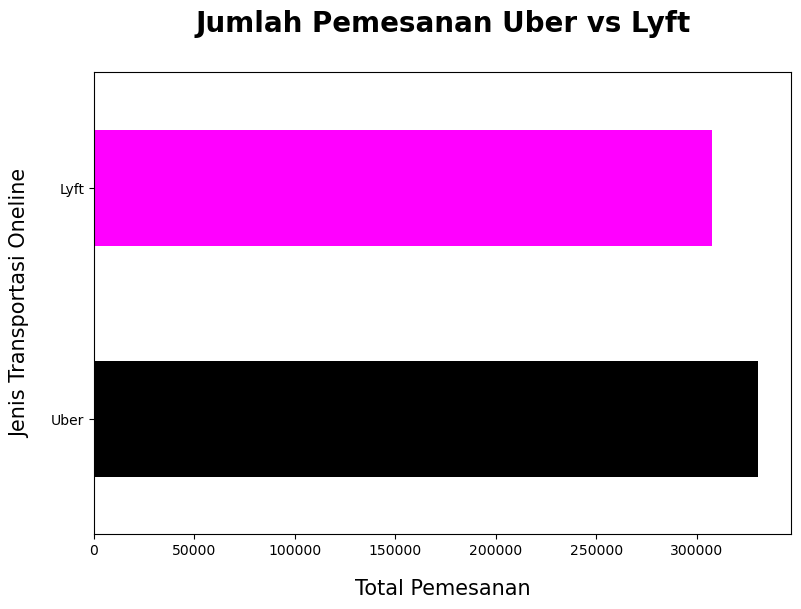

In [12]:
df['cab_type'].value_counts().plot(kind='barh', figsize=(9, 6), color=['black', 'magenta'])

plt.xlabel('Total Pemesanan', labelpad=15, fontsize=15)
plt.ylabel('Jenis Transportasi Oneline', labelpad=15, fontsize=15)
plt.title('Jumlah Pemesanan Uber vs Lyft\n', fontsize=20, weight='bold')
plt.style.use('fivethirtyeight')

plt.show()

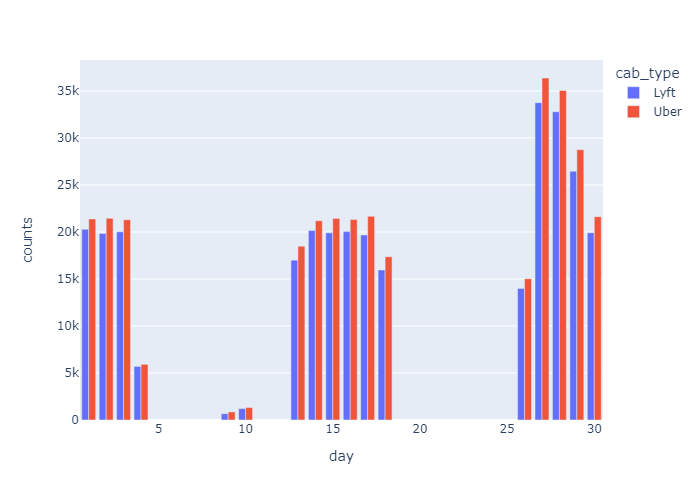

In [13]:
df2 =df.groupby(by=["day","cab_type"]).size().reset_index(name="counts")
fig2 = px.bar(data_frame=df2, x="day", y="counts", color="cab_type", barmode="group")
fig2.show(renderer='png')

In [14]:
df['month'].value_counts()

12    374205
11    263771
Name: month, dtype: int64

#### Month Data

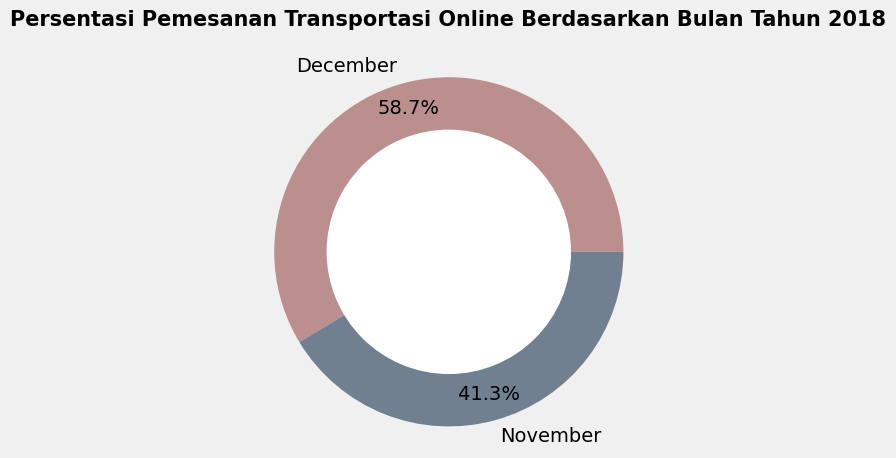

In [15]:
color_list1 = ['rosybrown', 'slategray']
labels1 = ['December', 'November']

fig1, ax1 = plt.subplots()

ax1.pie(df['month'].value_counts(), colors=color_list1, labels=labels1, autopct='%1.1f%%', pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
ax1.set_title('Persentasi Pemesanan Transportasi Online Berdasarkan Bulan Tahun 2018\n', fontsize=15, weight='bold')  
plt.tight_layout()
plt.show()

In [16]:
def plot_bar(groupby_column):
    df1 =df.groupby(groupby_column).size().reset_index(name="counts")
    fig1 = px.bar(data_frame=df1, x=groupby_column, y="counts", color=groupby_column, barmode="group")
    print(df1)
    fig1.show(renderer='png')

#### Day Data

    day  counts
0     1   41680
1     2   41298
2     3   41323
3     4   11627
4     9    1529
5    10    2534
6    13   35496
7    14   41344
8    15   41332
9    16   41359
10   17   41354
11   18   33329
12   26   29028
13   27   70135
14   28   67842
15   29   55222
16   30   41544


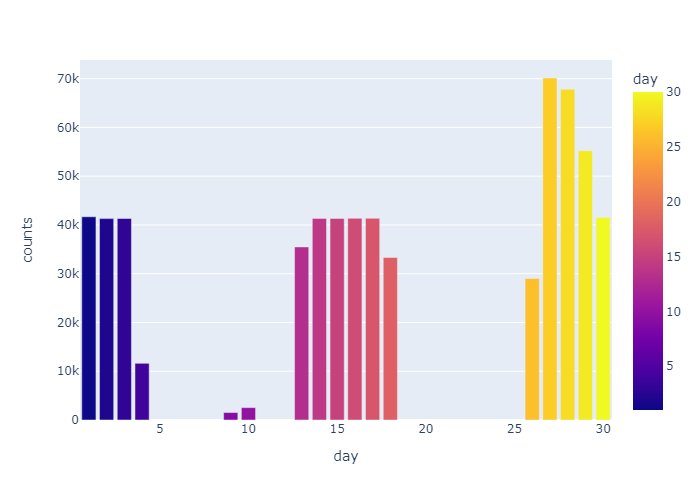

In [17]:
plot_bar('day')

#### Hour Data

    hour  counts
0      0   29872
1      1   26310
2      2   26323
3      3   25530
4      4   26125
5      5   22995
6      6   25147
7      7   22930
8      8   22337
9      9   26673
10    10   27918
11    11   27946
12    12   28017
13    13   27977
14    14   27976
15    15   27868
16    16   27972
17    17   28075
18    18   27958
19    19   25410
20    20   24620
21    21   25549
22    22   27093
23    23   29355


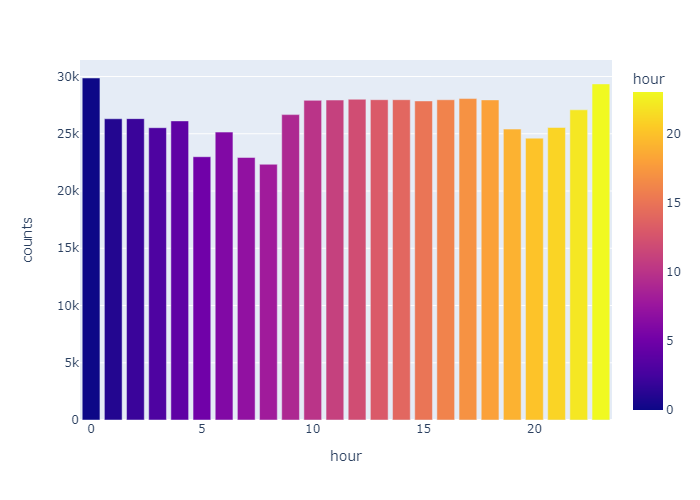

In [18]:
plot_bar('hour')

#### Source and Destination Analysis

                     source  counts
0                  Back Bay   53201
1               Beacon Hill   52841
2         Boston University   53172
3                    Fenway   53166
4        Financial District   54197
5          Haymarket Square   53147
6                 North End   53171
7             North Station   52576
8   Northeastern University   53164
9             South Station   53160
10         Theatre District   53201
11                 West End   52980


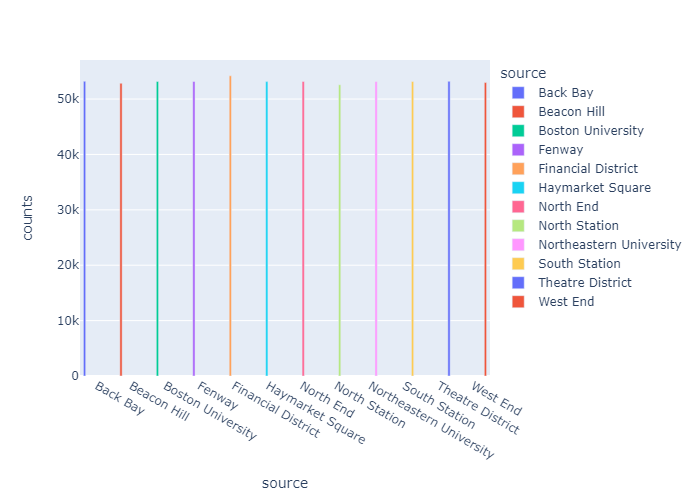

In [19]:
plot_bar('source')

                destination  counts
0                  Back Bay   53190
1               Beacon Hill   52840
2         Boston University   53171
3                    Fenway   53166
4        Financial District   54192
5          Haymarket Square   53171
6                 North End   53164
7             North Station   52577
8   Northeastern University   53165
9             South Station   53159
10         Theatre District   53189
11                 West End   52992


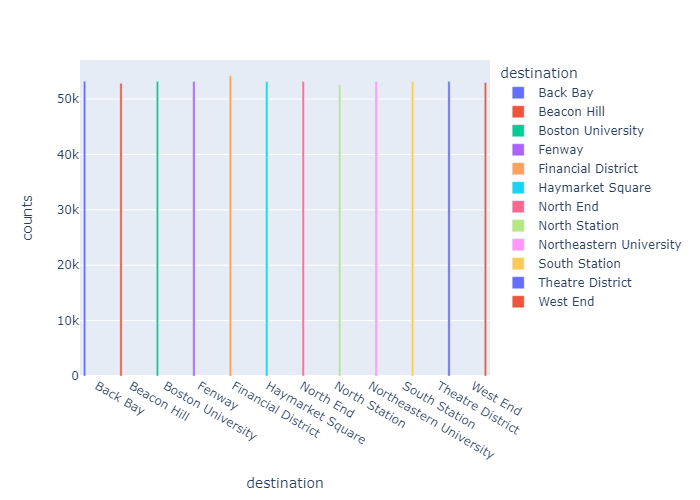

In [20]:
plot_bar('destination')

In [21]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

#### Price Analysis

In [22]:
pd.set_option('display.max_rows', 72)
df.groupby(by=["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 

In [23]:
print('Harga tertinggi yang ada :',df.price.max())
df[df['price']==df.price.max()]

Harga tertinggi yang ada : 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,0.0,1543683600,31.57,1543665600,44.65,1543690800,28.1,1543658400,43.98,1543690800


### Data Preprocessing

#### Removing Unnecessary Features

In [24]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'appare

In [25]:
new_df = df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [26]:
new_df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,57,0.72,0,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,90,1.00,0,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,240,0.03,0,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,310,0.00,0,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,303,0.44,0,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [27]:
new_df.shape

(637976, 41)

In [28]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [29]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


<AxesSubplot:>

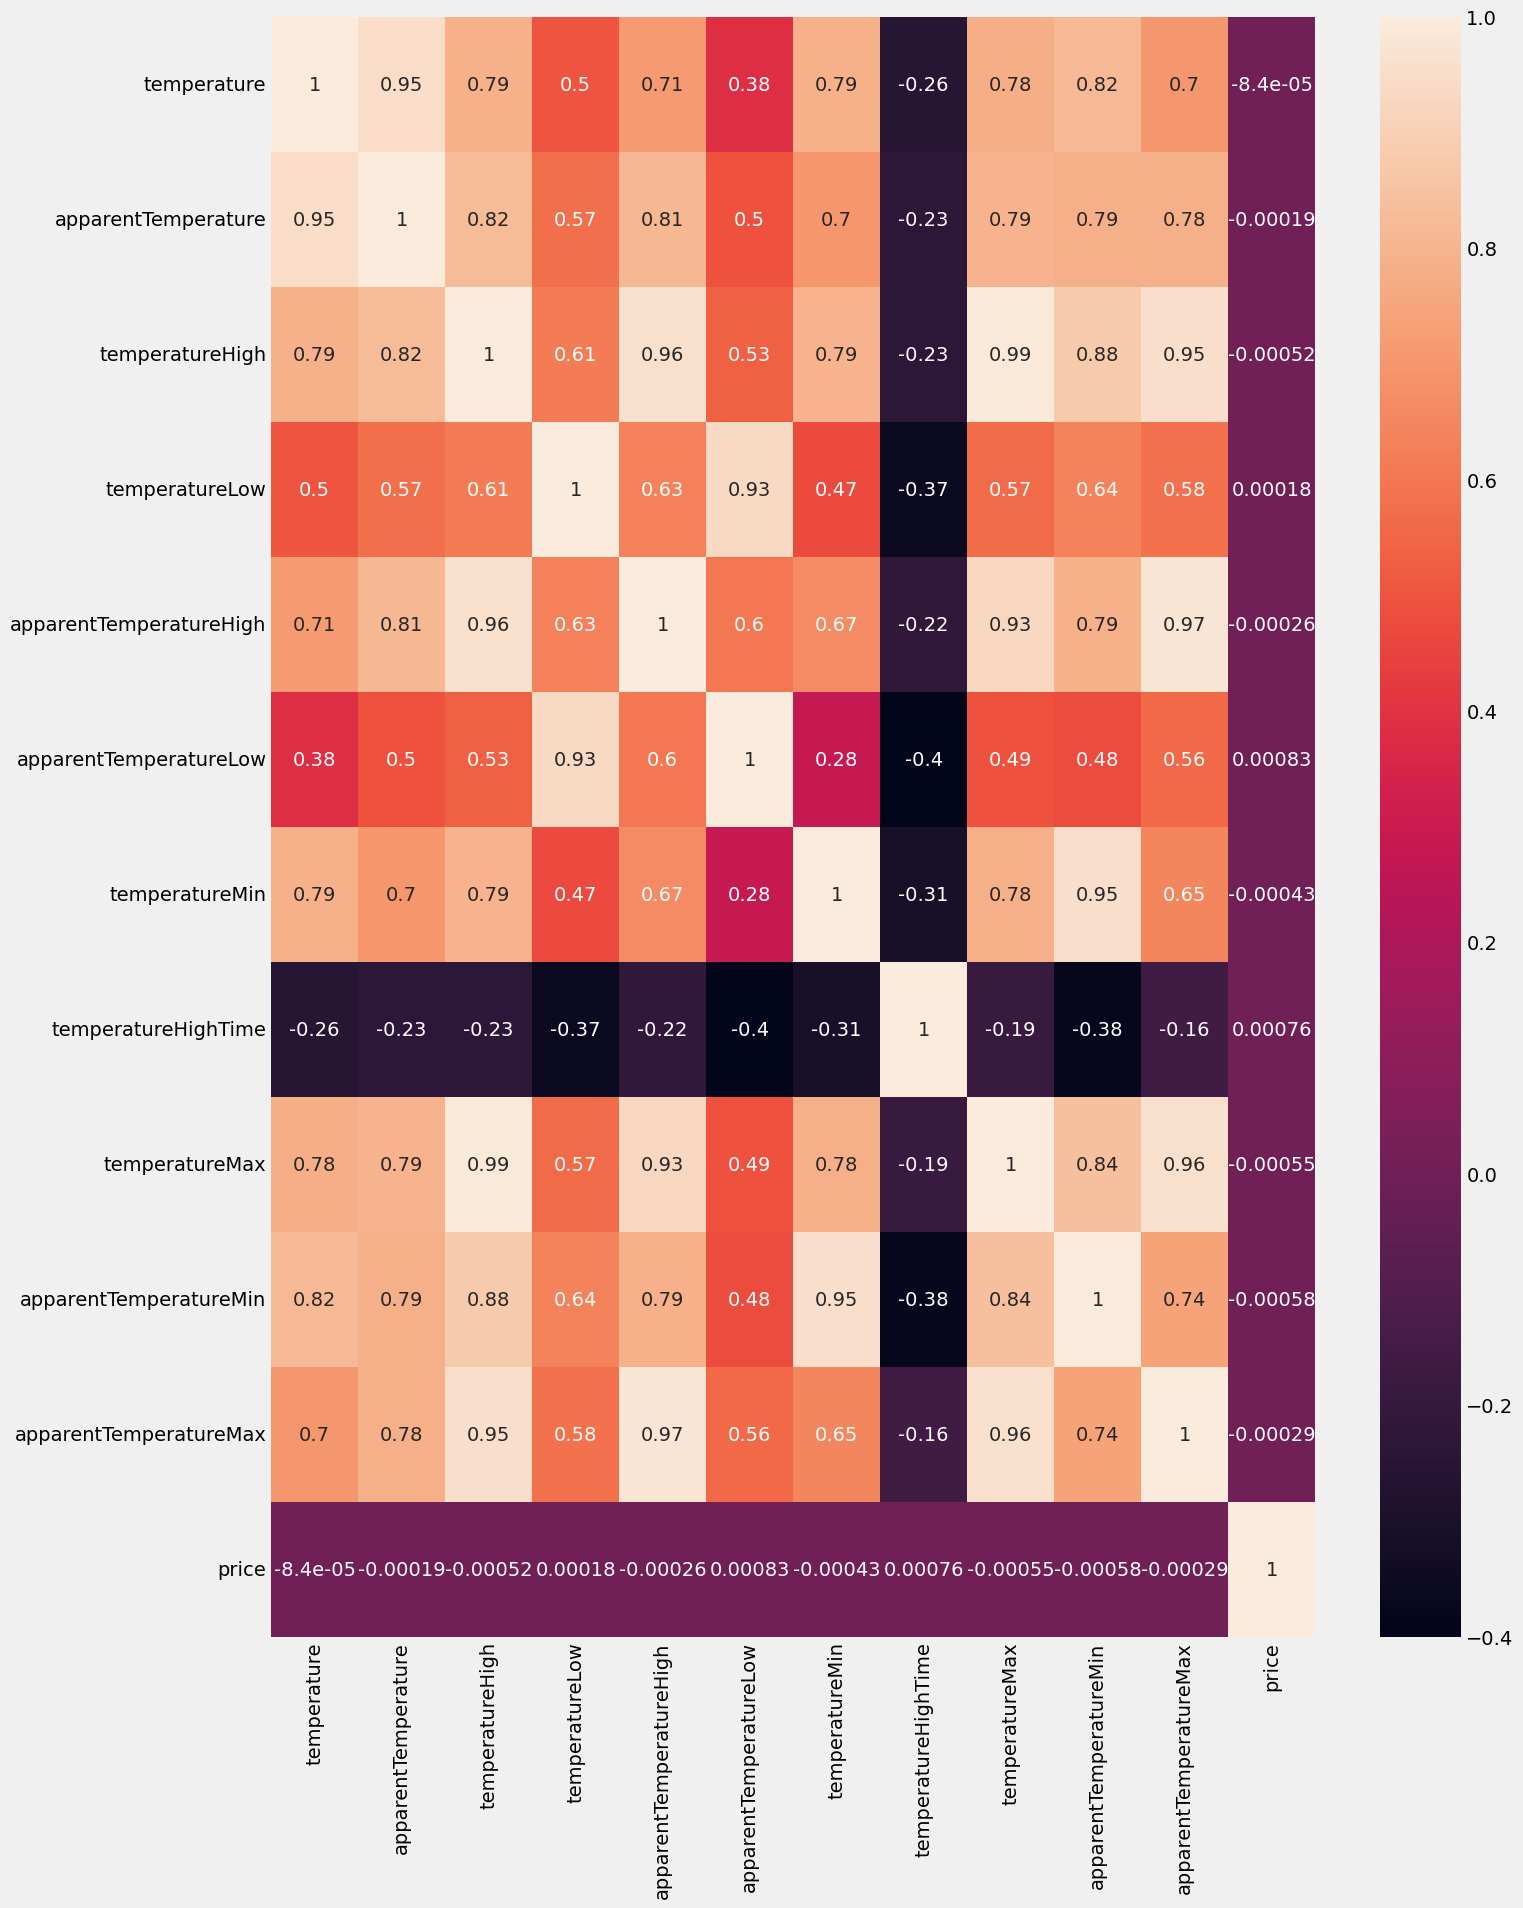

In [30]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

**Keterangan**
<br>
Semua feature mengenai temperatur tidak memiliki korelasi yang kuat terhadap variabel target. Menghapus semua feature temperatur tidak akan mengubah atau berpengaruh kuat terhadap Linear Regression model.

In [31]:
new_df.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh', 'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'], axis=1, inplace=True)
new_df.shape

(637976, 30)

In [32]:
new_df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,...,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,...,10.000,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,...,4.786,rain,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,...,10.000,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,...,10.000,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,...,10.000,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [33]:
climate_column = [
    'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
    'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
    'cloudCover', 'uvIndex', 'ozone', 'moonPhase', 'precipIntensityMax','price'
    ]
df_clim = new_df[climate_column]
df_clim.head()

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<AxesSubplot:>

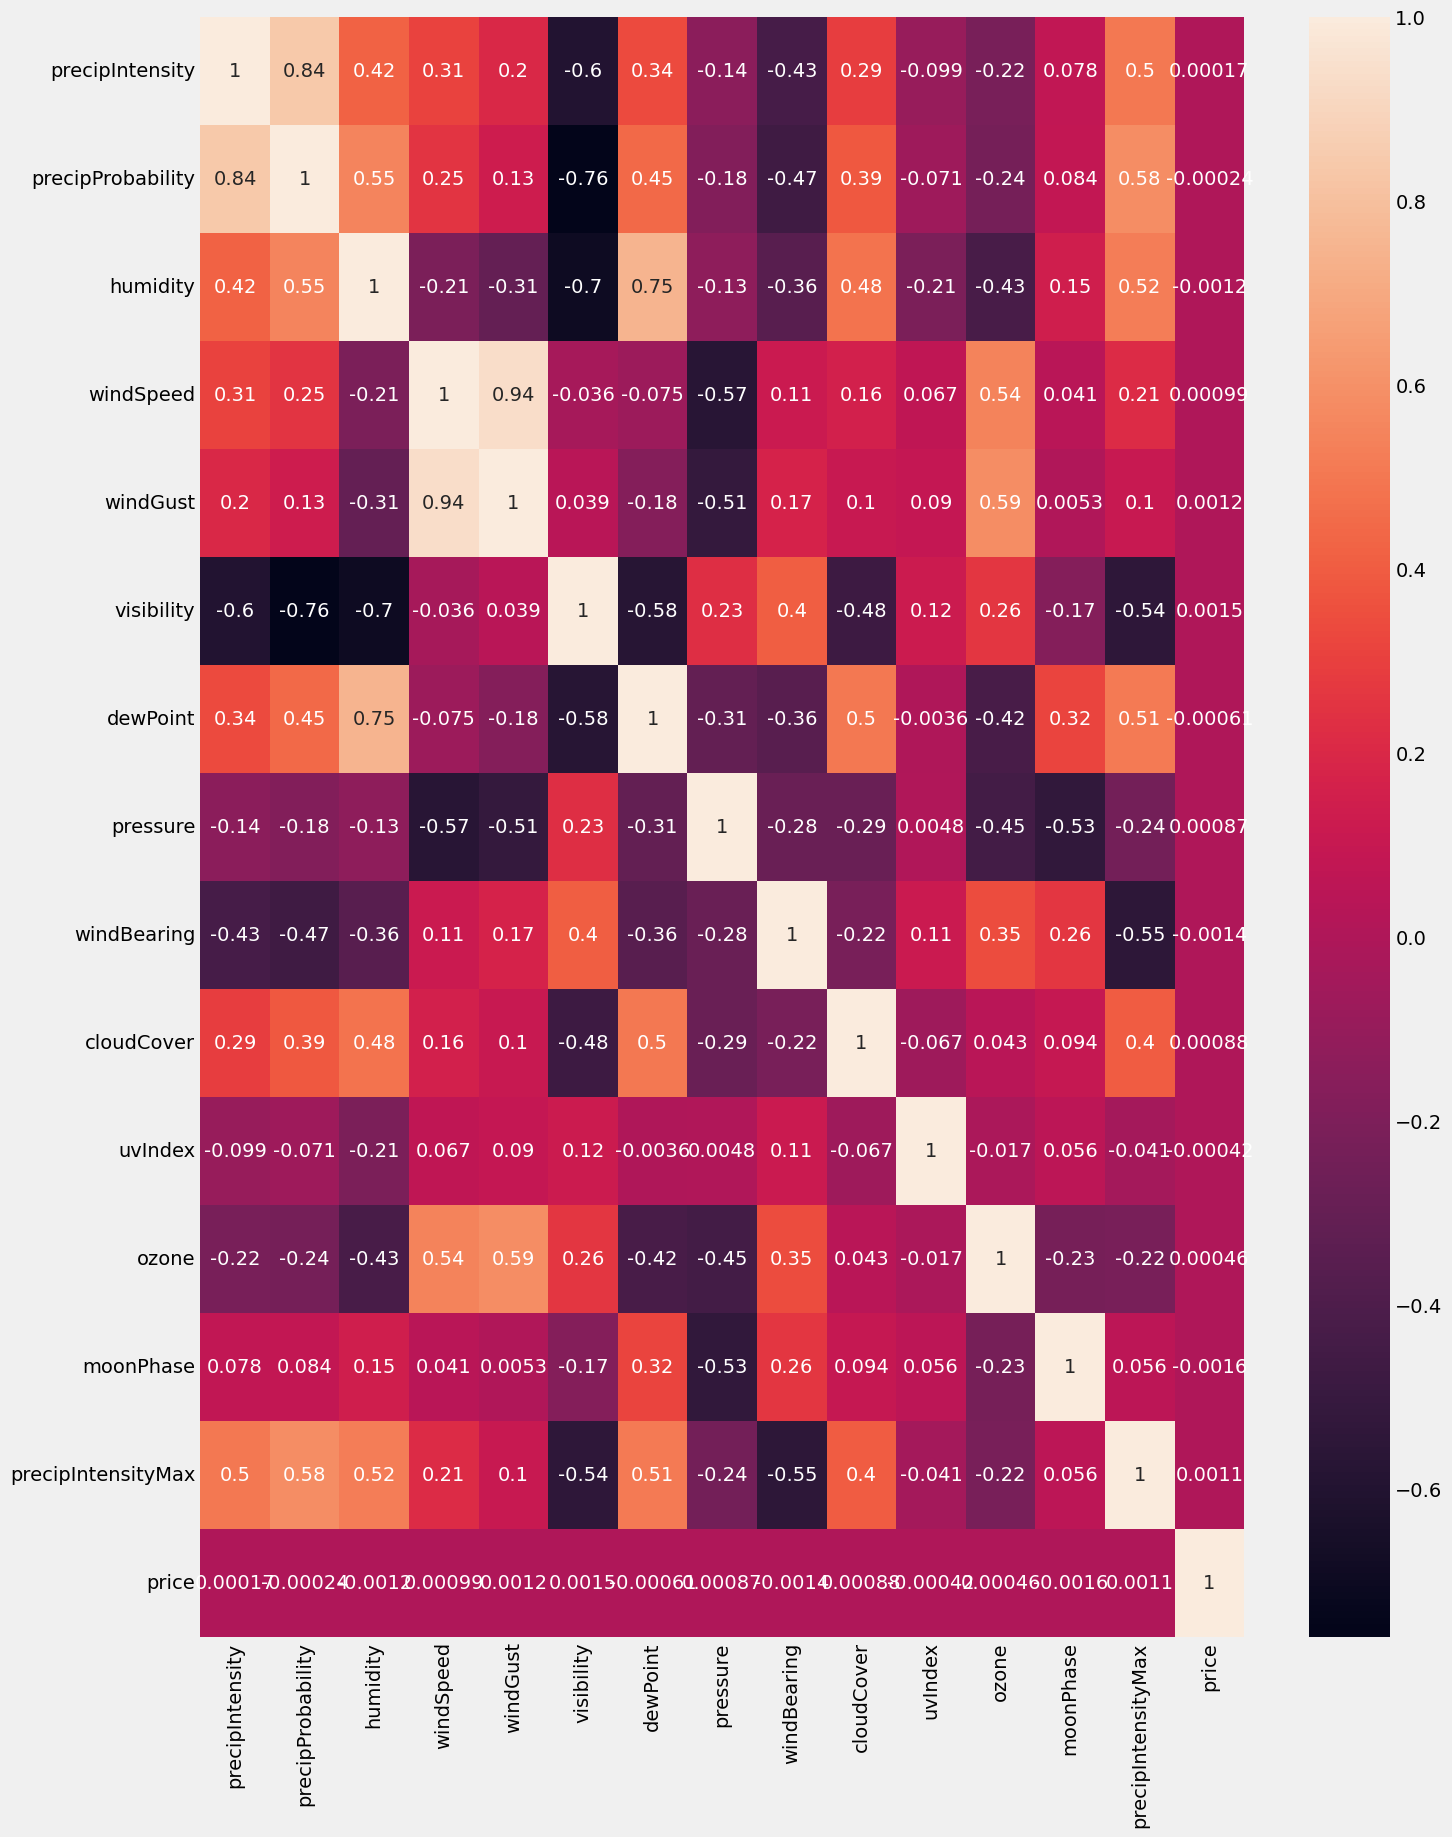

In [34]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

**Keterangan**
<br>
Feature yang berhubungan dengan cuaca juga memiliki korelasi yang kurang signifikan terhadap variabel target

In [35]:
new_df.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'], axis=1, inplace=True)
new_df.shape

(637976, 16)

In [36]:
new_df.head()

,hour,day,month,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon
0,9,16,12,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,partly-cloudy-night
1,2,27,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,rain
2,1,28,11,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,clear-night
3,4,30,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,clear-night
4,3,29,11,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,partly-cloudy-night


In [37]:
new_df['timezone'].unique()

array(['America/New_York'], dtype=object)

In [38]:
new_df['product_id'].unique()

array(['lyft_line', 'lyft_premier', 'lyft', 'lyft_luxsuv', 'lyft_plus',
       'lyft_lux', '6f72dfc5-27f1-42e8-84db-ccc7a75f6969',
       '6c84fd89-3f11-4782-9b50-97c468b19529',
       '55c66225-fbe7-4fd5-9072-eab1ece5e23e',
       '9a0e7b09-b92b-4c41-9779-2ad22b4d779d',
       '6d318bcc-22a3-4af6-bddd-b409bfce1546',
       '997acbb5-e102-41e1-b155-9df7de0a73f2'], dtype=object)

**Keterangan**
<br>
Feature timezone hanya memiliki satu nilai data dan feature product_id memiliki nilai yang sulit untuk dimengerti sehingga bisa kita drop

In [39]:
new_df.drop(['timezone','product_id'], axis=1, inplace=True)
new_df.shape

(637976, 14)

In [40]:
new_df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,latitude,longitude,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.2148,-71.033,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,42.2148,-71.033,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,Partly Cloudy,partly-cloudy-night


In [41]:
new_feat = [
    'hour',
    'day',
    'month',
    'source',
    'destination',
    'cab_type',
    'name',
    'distance',
    'surge_multiplier',
    'short_summary',
    'icon',
    'price'
]

df_feat = new_df[new_feat]
df_feat.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,short_summary,icon,price
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,Mostly Cloudy,partly-cloudy-night,5.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,Rain,rain,11.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,Clear,clear-night,7.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,Clear,clear-night,26.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,Partly Cloudy,partly-cloudy-night,9.0


In [42]:
le = preprocessing.LabelEncoder()

df_cat_encode= df_feat.copy()
for col in df_cat_encode.select_dtypes(include='O').columns:
    df_cat_encode[col]=le.fit_transform(df_cat_encode[col])

In [43]:
df_cat_encode.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,short_summary,icon,price
0,9,16,12,5,7,0,7,0.44,1.0,4,5,5.0
1,2,27,11,5,7,0,2,0.44,1.0,8,6,11.0
2,1,28,11,5,7,0,5,0.44,1.0,0,1,7.0
3,4,30,11,5,7,0,4,0.44,1.0,0,1,26.0
4,3,29,11,5,7,0,6,0.44,1.0,6,5,9.0


<AxesSubplot:>

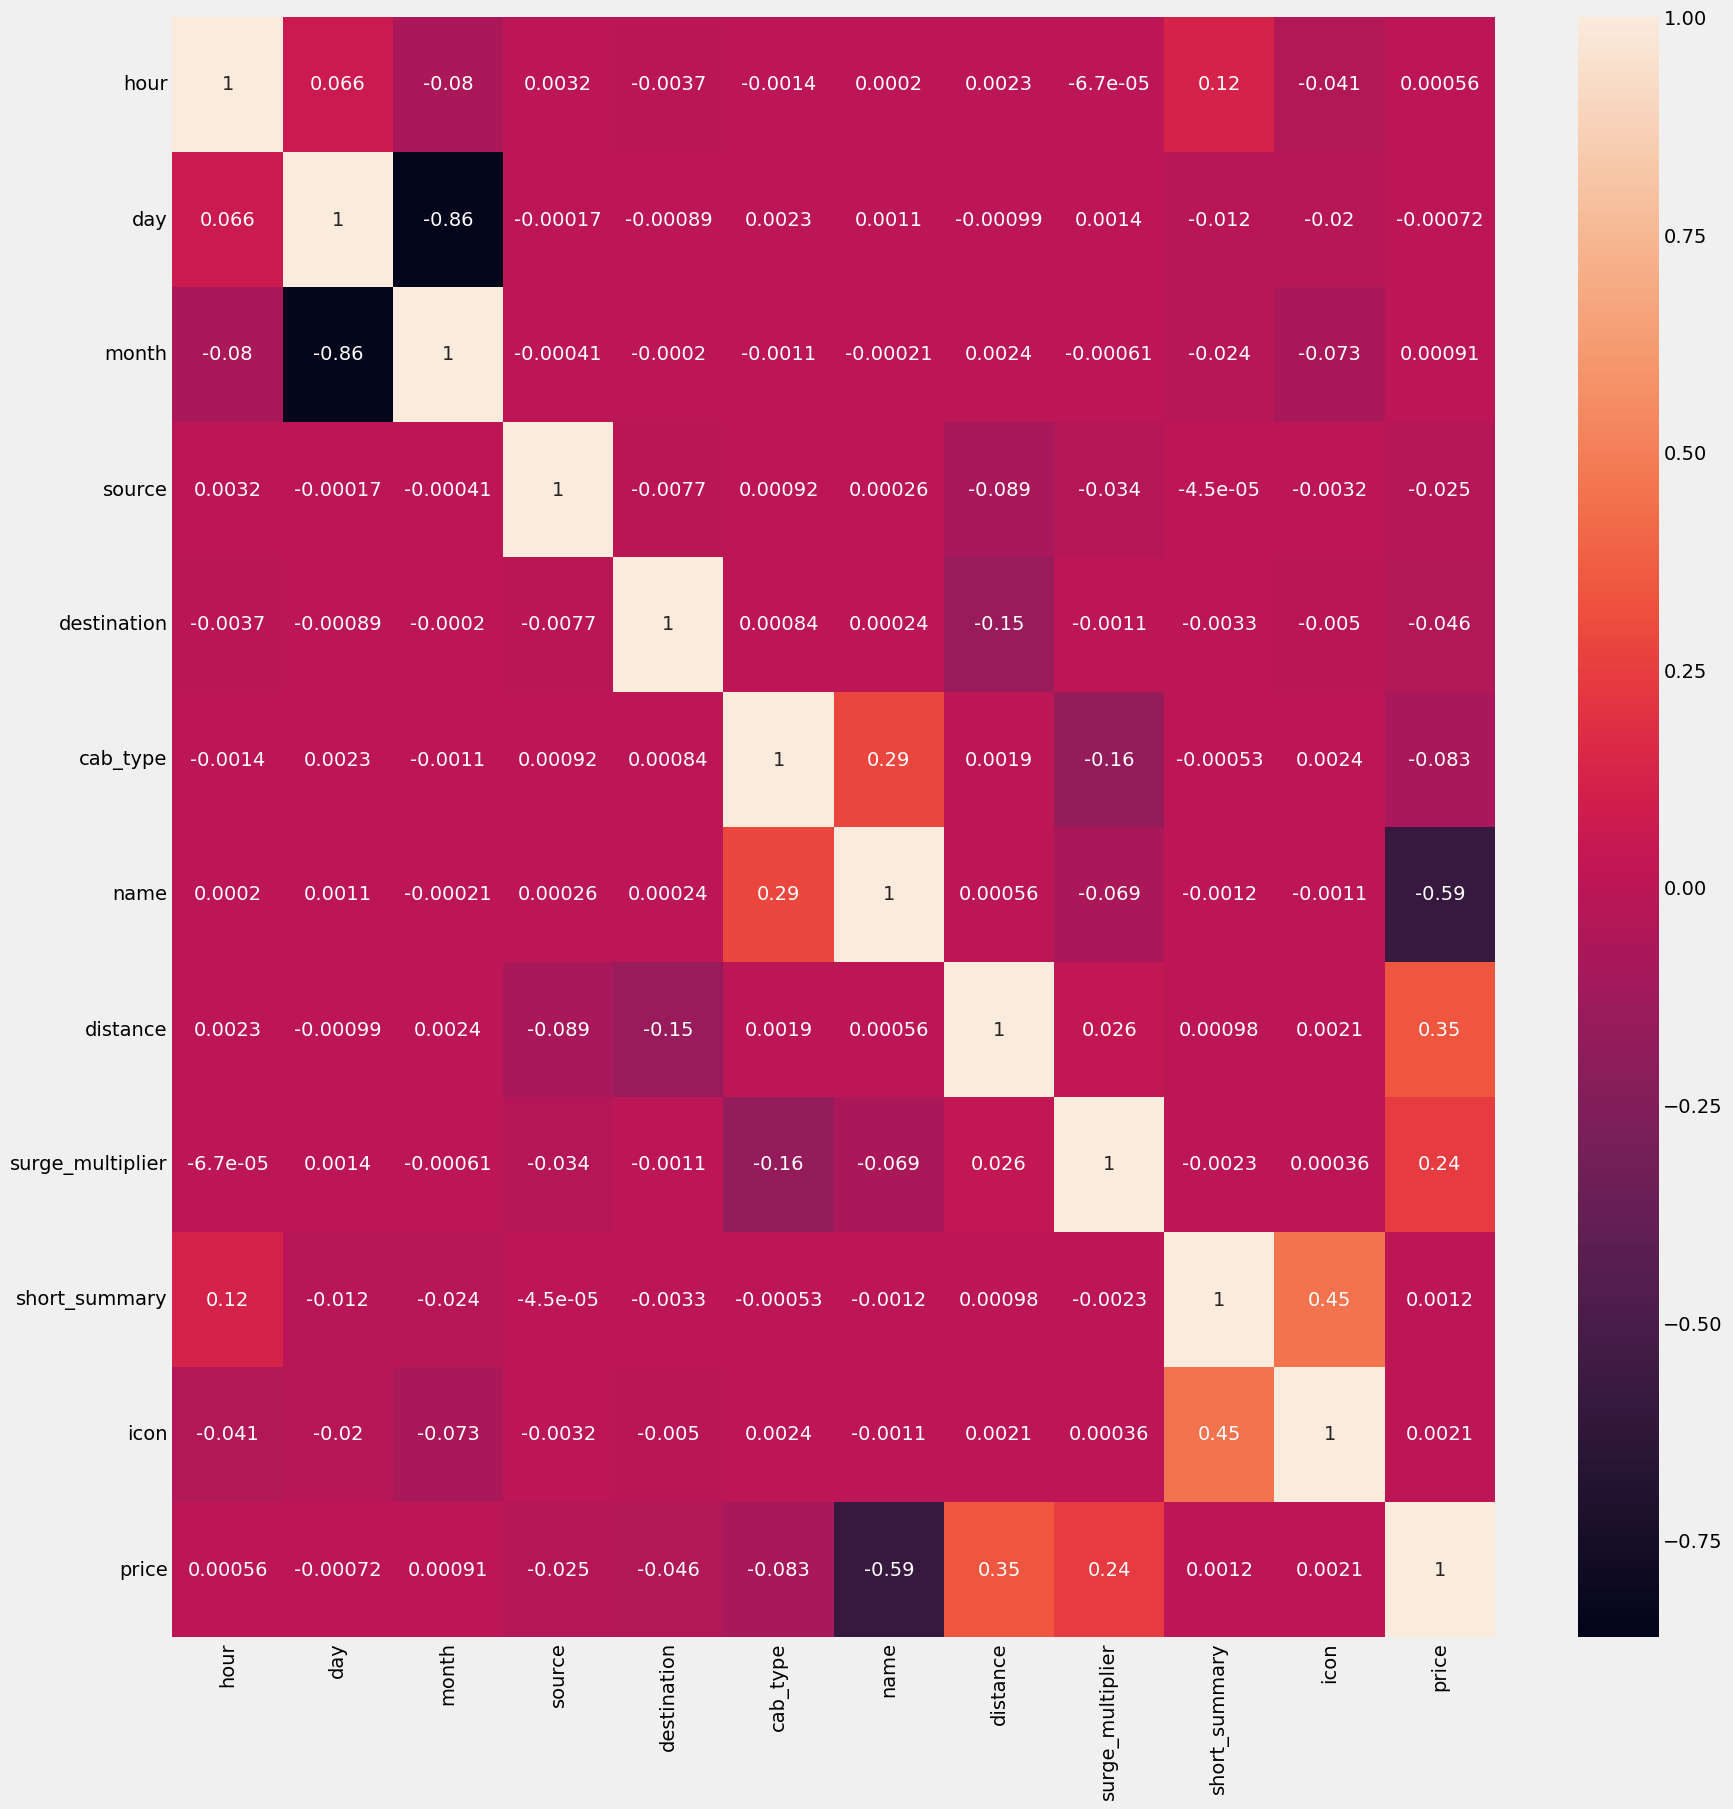

In [44]:
plt.figure(figsize=(19,20))
sns.heatmap(df_cat_encode.corr(),annot=True)

**Keterangan**
<br>
Dari heatmap di atas, bisa kita lihat bahwa feature yang memiliki korelasi yang kuat dengan variabel target, yaitu price, adalah distance, surge_multiplier, short_summary, icon, hour, dan month. Akan tetapi, icon memberikan informasi yang hampir sama dengan short_summary sehingga tidak perlu digunakan dan month hanya memiliki data bulan November dan Desember sehingga tidak bisa memberikan gambaran penuh terhadap korelasinya terhadap variabel target. Feature cab_type dan name akan tetap digunakan karena dasar dari dataset ini adalah perbandingan dari Uber dan Lyft walaupun korelasinya dengan variabel target tidak terlalu kuat

In [45]:
new_df = new_df.drop(['day', 'month', 'source', 'destination', 'icon', 'latitude', 'longitude'],axis=1)
new_df.head()

,hour,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy


In [46]:
new_df.columns

Index(['hour', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier',
       'short_summary'],
      dtype='object')

#### Removing Outliers

<AxesSubplot:>

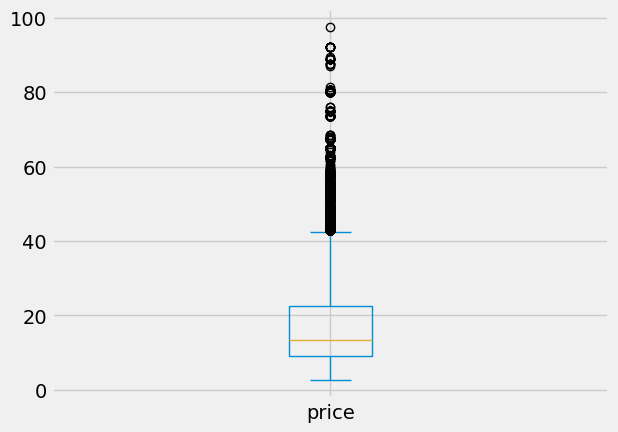

In [47]:
new_df['price'].plot(kind='box')

In [48]:
new_df[new_df['price'] >= 43]

,hour,cab_type,name,price,distance,surge_multiplier,short_summary
706,10,Lyft,Lux Black,52.5,3.25,2.00,Partly Cloudy
707,2,Lyft,Lux Black XL,67.5,3.25,2.00,Partly Cloudy
769,17,Lyft,Lux Black XL,45.5,4.76,1.00,Partly Cloudy
1094,17,Lyft,Lux Black XL,45.5,4.31,1.00,Light Rain
1318,16,Lyft,Lux Black XL,45.5,5.33,1.00,Overcast
...,...,...,...,...,...,...,...
692439,20,Uber,Black SUV,47.0,5.56,1.00,Mostly Cloudy
692698,10,Lyft,Lux Black XL,52.5,4.58,1.25,Partly Cloudy
692891,5,Lyft,Lux Black XL,47.5,5.42,1.00,Foggy
692962,4,Uber,Black SUV,51.0,7.36,1.00,Mostly Cloudy


**Keterangan**
<br>
Pada box plot, terlihat outliers mulai muncul sekitar price $43. Terdapat 5589 baris data dengan price $43 ke atas. Dibandingkan dengan jumlah data yang banyaknya 637976 baris data, 5589 tidak terlalu banyak sehingga bisa dihapus.

In [49]:
new_df = new_df[new_df['price'] < 43]
new_df

,hour,cab_type,name,price,distance,surge_multiplier,short_summary
0,9,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy
1,2,Lyft,Lux,11.0,0.44,1.0,Rain
2,1,Lyft,Lyft,7.0,0.44,1.0,Clear
3,4,Lyft,Lux Black XL,26.0,0.44,1.0,Clear
4,3,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy
...,...,...,...,...,...,...,...
693065,23,Uber,WAV,9.5,1.00,1.0,Partly Cloudy
693066,23,Uber,UberXL,13.0,1.00,1.0,Partly Cloudy
693067,23,Uber,UberX,9.5,1.00,1.0,Partly Cloudy
693069,23,Uber,Black SUV,27.0,1.00,1.0,Partly Cloudy


### Regression Model

#### Encoding Data

In [50]:
def one_hot_encoder(data,feature,keep_first=True):

    one_hot_cols = pd.get_dummies(data[feature])
    
    for col in one_hot_cols.columns:
        one_hot_cols.rename({col:f'{feature}_'+col},axis=1,inplace=True)
    
    new_data = pd.concat([data,one_hot_cols],axis=1)
    new_data.drop(feature,axis=1,inplace=True)
    
    if keep_first == False:
        new_data=new_data.iloc[:,1:]
    
    return new_data

In [51]:
new_df_onehot=new_df.copy()
for col in new_df_onehot.select_dtypes(include='O').columns:
    new_df_onehot=one_hot_encoder(new_df_onehot,col)
    
new_df_onehot.head()

,hour,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,...,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,9,5.0,0.44,1.0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,11.0,0.44,1.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,7.0,0.44,1.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,4,26.0,0.44,1.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3,9.0,0.44,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Dataset Split

In [52]:
X = new_df_onehot.drop(columns=['price'], axis=1).values
y = new_df_onehot['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [53]:
print(X[:,0].shape)
print(y.shape)

(632387,)
(632387,)


#### Modelling

In [54]:
lr = LinearRegression()

In [55]:
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [56]:
r2_score(y_test, y_pred)

0.933781400445477

In [57]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

5.108190613559107
2.2601306629394475


**Keterangan**
<br>
Model Linear Regression memiliki akurasi atau score 93.37%

<Figure size 800x500 with 0 Axes>

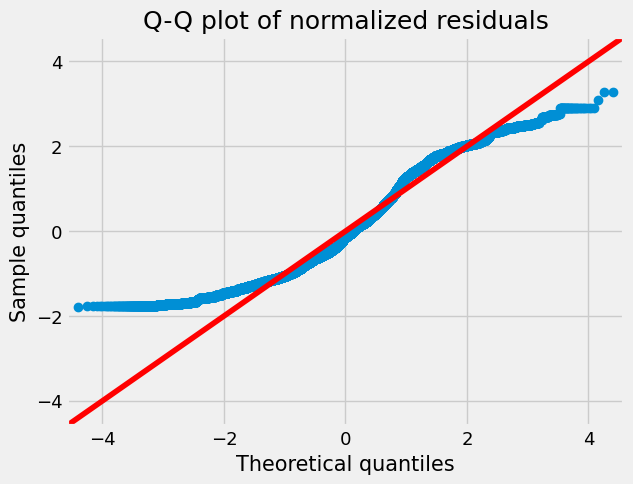

In [58]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(y_pred,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

In [59]:
X_train.shape

(442670, 26)

In [60]:
y_train.shape

(442670,)

In [61]:
X_test.shape

(189717, 26)

In [62]:
y_test.shape

(189717,)

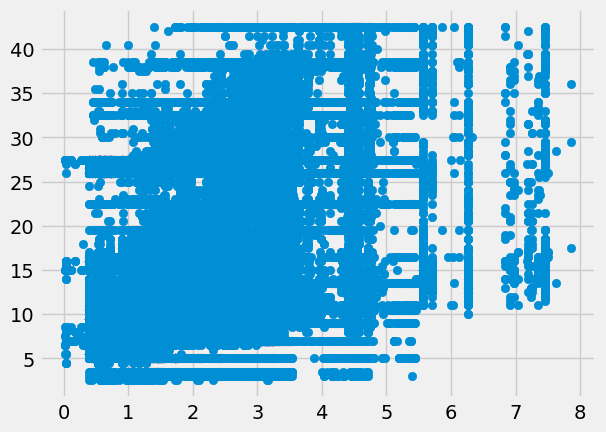

In [63]:
plt.scatter(X_test[:, 1], y_test)

In [65]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.933464,{'normalize': False}
1,lasso,0.211560,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.944066,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


**Keterangan**
<br>
Dapat dilihat, akurasi dari model Decision Tree mencapai 94.4% yang mana lebih tinggi dari menggunakan model linear regression.

In [70]:
X_test.shape

(189717, 26)

In [69]:
y_pred.shape

(189717,)

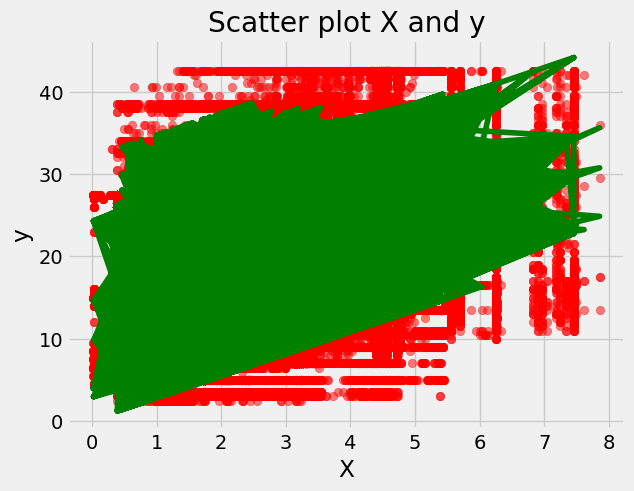

In [72]:
plt.scatter(X[:, 1], y, alpha=0.5, color='red')
plt.plot(X_test[:, 1], y_pred, color='green')
plt.title('Scatter plot X and y')
plt.xlabel('X')
plt.ylabel('y')
plt.show()